4. Which sector has the best moving average in there respective industry? (Alison)
    - Grouped bargraph: price values per sector (xlabel: sectors) --> moving average (1 graph)
5. Which ticker was most traded in each year? (Alison)
    - Answered by bar graph(name of stocks in each sector as xticks and height of the bar will be the average of volume)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tech_data = pd.read_csv('tech_data.csv').drop(columns={'Unnamed: 0'})
finance_data = pd.read_csv('../ExtractFinances/Financial_stock_data.csv')
auto_data = pd.read_csv('../Automotive/final_auto_stock_data.csv')
tech_data.head()

,Date,Ticker,Sector,Industry,Open,High,Low,Close,Volume
0,2018-01-02,NVDA,Technology,Semiconductors,195.78,199.50,194.50,199.35,8303752.0
1,2018-01-03,NVDA,Technology,Semiconductors,204.10,213.70,203.75,212.47,22499518.0
2,2018-01-04,NVDA,Technology,Semiconductors,215.76,218.05,212.69,213.59,14346675.0
3,2018-01-05,NVDA,Technology,Semiconductors,214.19,216.91,211.08,215.40,14008768.0
4,2018-01-08,NVDA,Technology,Semiconductors,220.40,225.00,218.58,222.00,21190932.0


In [8]:
data = pd.concat([tech_data, finance_data, auto_data])

In [4]:
print(tech_data['Ticker'].unique())
print(finance_data['Ticker'].unique())
print(auto_data['Ticker'].unique())
array = np.append((np.append(tech_data['Ticker'].unique(), finance_data['Ticker'].unique())),auto_data['Ticker'].unique())
np.unique(array)

['NVDA' 'TSM' 'AVGO' 'AMD' 'INTC' 'CRM' 'SAP' 'INTU' 'NOW' 'ZI' 'AAPL'
 'MSFT' 'SONY' 'LPL' 'SONO' 'ACN' 'IBM' 'FI' 'INFY' 'CTSH']
['WD' 'PFSI' 'LDI' 'GHI' 'COOP' 'AFL' 'HIG' 'PRU' 'ALL' 'PGR' 'MS' 'BLK'
 'GS' 'TROW' 'BEN' 'V' 'MA' 'AXP' 'DFS' 'COF']
['CPRT' 'KMX' 'PAG' 'LAD' 'AN' 'MBLY' 'APTV' 'MGA' 'LKQ' 'ALV' 'TSLA' 'TM'
 'HMC' 'GM' 'F' 'NVDA' 'TSM' 'AVGO' 'AMD' 'INTC']


array(['AAPL', 'ACN', 'AFL', 'ALL', 'ALV', 'AMD', 'AN', 'APTV', 'AVGO',
       'AXP', 'BEN', 'BLK', 'COF', 'COOP', 'CPRT', 'CRM', 'CTSH', 'DFS',
       'F', 'FI', 'GHI', 'GM', 'GS', 'HIG', 'HMC', 'IBM', 'INFY', 'INTC',
       'INTU', 'KMX', 'LAD', 'LDI', 'LKQ', 'LPL', 'MA', 'MBLY', 'MGA',
       'MS', 'MSFT', 'NOW', 'NVDA', 'PAG', 'PFSI', 'PGR', 'PRU', 'SAP',
       'SONO', 'SONY', 'TM', 'TROW', 'TSLA', 'TSM', 'V', 'WD', 'ZI'],
      dtype=object)

#### All companies

In [5]:
print(f'There are {len(data["Ticker"].unique())} stocks')

There are 55 stocks


In [10]:
data_sectors = data['Sector'].unique()
close_prices = []
for sector in data_sectors:
    close_prices.append(data[data['Sector']==sector].groupby('Date')['Close'].sum().rename(sector))

close_prices_sector = pd.concat(close_prices, axis = 1)
close_prices_sector

,Technology,Finance,Automobiles
Date,,,
2018-01-02,1916.25,1975.795009,1739.23
2018-01-03,1943.10,1983.375045,1762.93
2018-01-04,1960.99,2002.769992,1772.72
2018-01-05,1980.18,2019.825018,1794.66
2018-01-08,1989.89,2019.839986,1827.63
...,...,...,...
2023-11-30,4724.15,3144.529962,3150.65
2023-12-01,4751.80,3177.559958,3186.01
2023-12-04,4700.84,3175.820027,3157.67


In [17]:
mov_avg_dict = {}
ma_days = [30, 60, 150]
for sector in data_sectors:
    mov_avg = {}
    mov_avg[sector] = close_prices_sector[sector]
    for ma in ma_days:
        column_name = f"MA for {ma} days"
        mov_avg[column_name] = close_prices_sector[sector].rolling(ma).mean()
    mov_avg_df = pd.DataFrame(mov_avg)
    mov_avg_dict[sector] = mov_avg_df

mov_avg_dict['Technology']

,Technology,MA for 30 days,MA for 60 days,MA for 150 days
Date,,,,
2018-01-02,1916.25,NaN,NaN,NaN
2018-01-03,1943.10,NaN,NaN,NaN
2018-01-04,1960.99,NaN,NaN,NaN
2018-01-05,1980.18,NaN,NaN,NaN
2018-01-08,1989.89,NaN,NaN,NaN
...,...,...,...,...
2023-11-30,4724.15,4437.383500,4336.168833,4199.265600
2023-12-01,4751.80,4455.715833,4342.267667,4207.177067
2023-12-04,4700.84,4475.012167,4347.630000,4214.687133


Text(0.5, 1.0, 'Automotives')

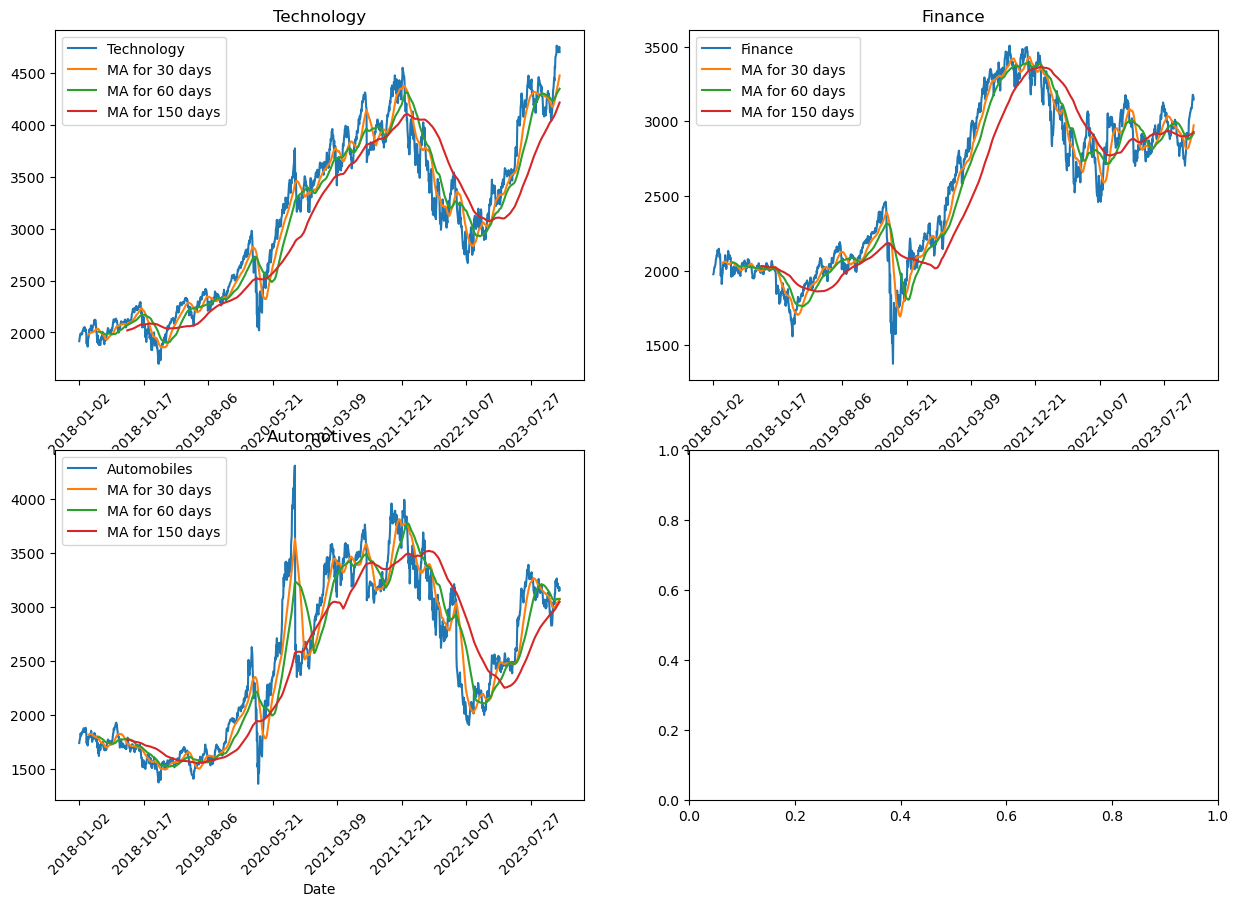

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

mov_avg_dict['Technology'].plot(ax=axes[0,0], rot = 45)
axes[0,0].set_title('Technology')

mov_avg_dict['Finance'].plot(ax=axes[0,1], rot = 45)
axes[0,1].set_title('Finance')

mov_avg_dict['Automobiles'].plot(ax=axes[1, 0], rot = 45)
axes[1, 0].set_title('Automotives')